In [1]:
import scipy
import sys
sys.path.append('./src/')
import pycvxcluster.pycvxcluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [3]:
# ============
# Generate datasets.
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
datasets_ = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

/var/folders/6h/d7ddv5f12t7db6t_9pwd3b2r0000gn/T/ipykernel_54712/3767029102.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")


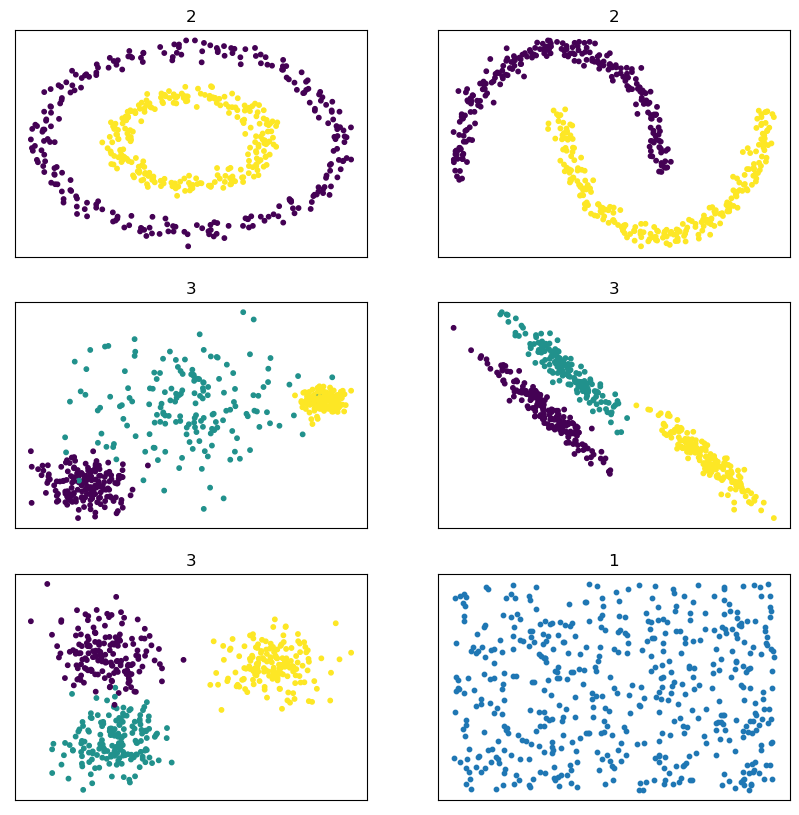

In [44]:
# Plot the generated data
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, dataset in zip(axes, datasets_):
    X, y = dataset
    ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("{}".format(len(np.unique(y))))
    

Computing weights...
Weights computed in 0.024840958009008318 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:343: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:442: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 0.18288916704477742 seconds.
Status: converged, Iterations: 14
Clustering completed in 0.20773012505378574 seconds.
Computing weights...
Weights computed in 0.025544790958520025 seconds.
Starting SSNAL...
SSNAL terminated in 0.33960412500891834 seconds.
Status: converged, Iterations: 21
Clustering completed in 0.36514891596743837 seconds.
Computing weights...
Weights computed in 0.02491566597018391 seconds.
Starting SSNAL...
SSNAL terminated in 0.21499383298214525 seconds.
Status: converged, Iterations: 10
Clustering completed in 0.23990949895232916 seconds.
Computing weights...
Weights computed in 0.0228457500343211 seconds.
Starting SSNAL...
SSNAL terminated in 0.37334087502676994 seconds.
Status: converged, Iterations: 16
Clustering completed in 0.39618662506109104 seconds.
Computing weights...
Weights computed in 0.023196250025648624 seconds.
Starting SSNAL...
SSNAL terminated in 0.15201833297032863 seconds.
Status: converged, Iterations: 10
Clustering completed

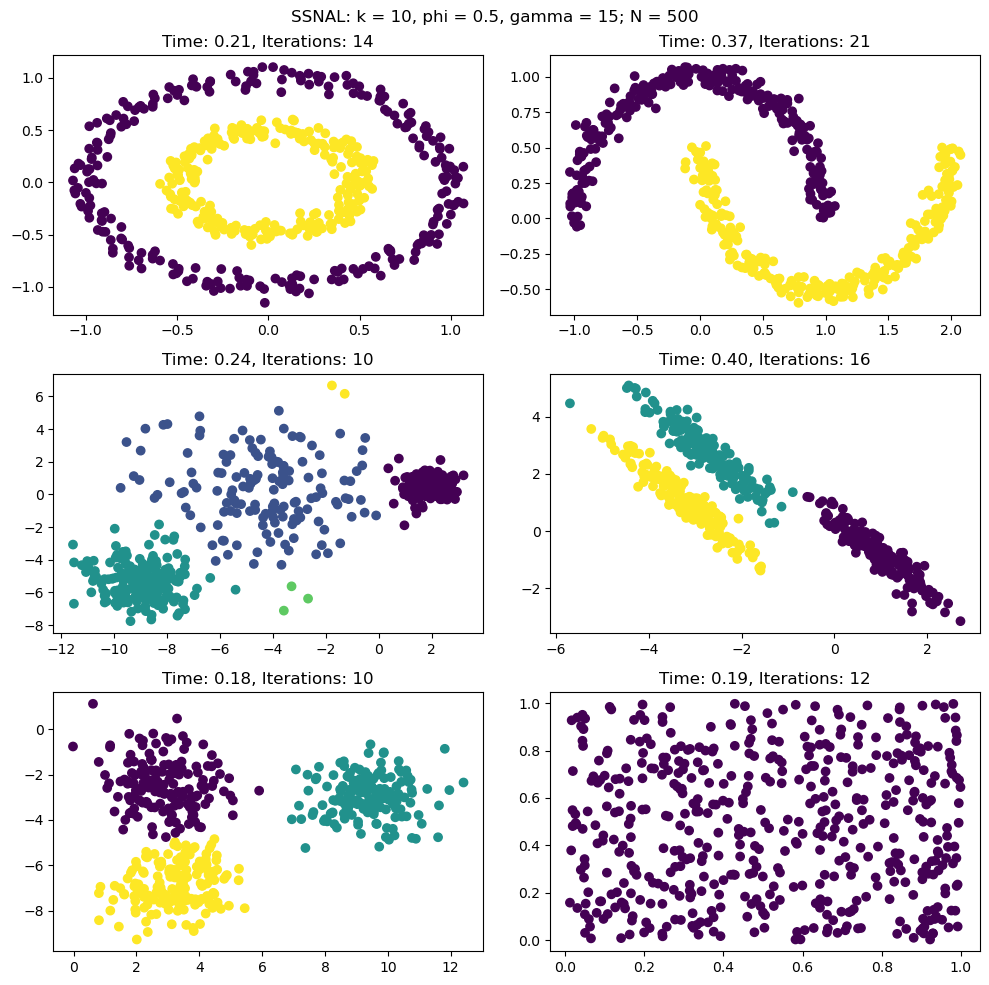

In [3]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = 15)
times = np.zeros(len(datasets_))
iterations = np.zeros(len(datasets_))
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, data in enumerate(datasets_):
    ssnal.fit(data[0])
    times[i] = ssnal.tot_time_
    iterations[i] = ssnal.iter_
    axes[i // 2, i % 2].scatter(data[0][:, 0], data[0][:, 1], c=ssnal.labels_)
    axes[i // 2, i % 2].set_title(f"Time: {times[i]:.2f}, Iterations: {iterations[i]:.0f}")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}; N = {n_samples}")
plt.tight_layout()
plt.show()


Running for 100 samples----------------------------------
Computing weights...
Weights computed in 0.00610833300743252 seconds.
Starting SSNAL...
SSNAL terminated in 0.0386535000288859 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04476183303631842 seconds.
Computing weights...
Weights computed in 0.005127666983753443 seconds.
Starting SSNAL...
SSNAL terminated in 0.036376875010319054 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.0415045419940725 seconds.
Computing weights...
Weights computed in 0.0053526670089922845 seconds.
Starting SSNAL...
SSNAL terminated in 0.03643729200121015 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04178995901020244 seconds.
----------------------------------
Running for 500 samples----------------------------------
Computing weights...
Weights computed in 0.024097541987430304 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:343: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL terminated in 0.08552341698668897 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10962095897411928 seconds.
Computing weights...
Weights computed in 0.024221832980401814 seconds.
Starting SSNAL...
SSNAL terminated in 0.07959012500941753 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10381195798981935 seconds.
Computing weights...
Weights computed in 0.024017042014747858 seconds.
Starting SSNAL...
SSNAL terminated in 0.0788463749922812 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10286341700702906 seconds.
----------------------------------
Running for 1000 samples----------------------------------
Computing weights...
Weights computed in 0.06182750000152737 seconds.
Starting SSNAL...
SSNAL terminated in 0.16244408302009106 seconds.
Status: converged, Iterations: 9
Clustering completed in 0.22427158302161843 seconds.
Computing weights...
Weights computed in 0.045394791988655925 seconds.
Starting SSNAL...
SSNAL termin

/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:442: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 2.680250375007745 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.160412333032582 seconds.
Computing weights...
Weights computed in 0.5028147920384072 seconds.
Starting SSNAL...
SSNAL terminated in 2.853162292041816 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.355977084080223 seconds.
Computing weights...
Weights computed in 0.5132251660106704 seconds.
Starting SSNAL...
SSNAL terminated in 2.7943217499996535 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.307546916010324 seconds.
----------------------------------
Running for 20000 samples----------------------------------
Computing weights...
Weights computed in 1.016681624983903 seconds.
Starting SSNAL...
SSNAL terminated in 11.975015499978326 seconds.
Status: converged, Iterations: 18
Clustering completed in 12.99169712496223 seconds.
Computing weights...
Weights computed in 0.9964145420235582 seconds.
Starting SSNAL...
SSNAL terminated in 11.50449

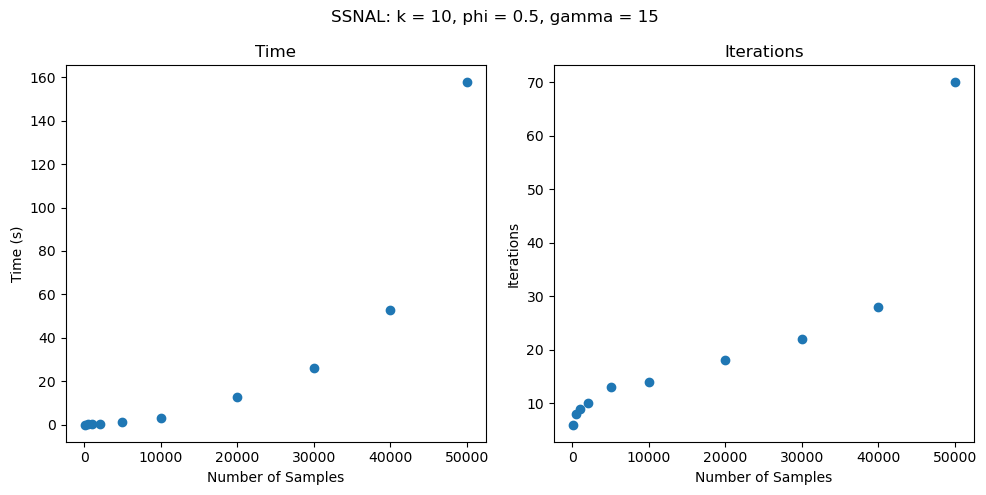

In [7]:
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
times = np.zeros(len(sizes))
iterations = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers = 5, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = 15)
        labels = ssnal.fit_predict(X)
        times[j] += ssnal.tot_time_
        iterations[j] += ssnal.iter_
    times[j] /= n_fits
    iterations[j] /= n_fits
    print("----------------------------------")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(sizes, times)
axes[0].set_title("Time")
axes[0].set_xlabel("Number of Samples")
axes[0].set_ylabel("Time (s)")
axes[1].scatter(sizes, iterations)
axes[1].set_title("Iterations")
axes[1].set_xlabel("Number of Samples")
axes[1].set_ylabel("Iterations")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()


Computing weights...
Weights computed in 0.2625296670012176 seconds.
Starting SSNAL...
SSNAL terminated in 0.6669025840237737 seconds.
Status: converged, Iterations: 9
Clustering completed in 0.9294322510249913 seconds.


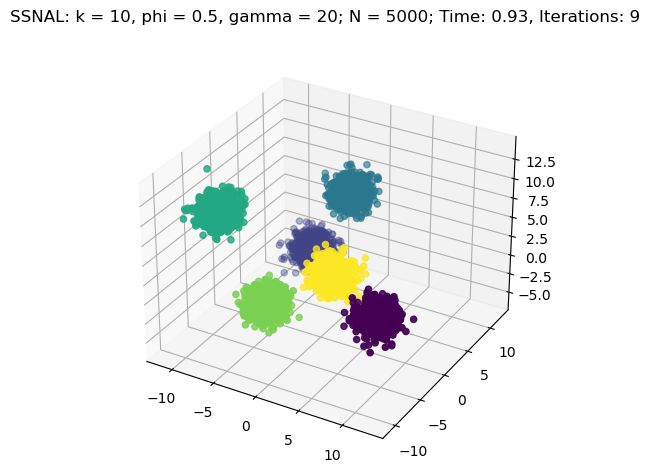

In [19]:
n_samples = 5000
blobs3d = datasets.make_blobs(n_samples=n_samples, random_state=seed, n_features=3, centers = 6, cluster_std = 1)
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = 20)
labels = ssnal.fit_predict(blobs3d[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(blobs3d[0][:,0], blobs3d[0][:,1], blobs3d[0][:,2], c=labels)
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}; N = {n_samples}; Time: {ssnal.tot_time_:.2f}, Iterations: {ssnal.iter_:.0f}")
plt.tight_layout()
plt.show()

Computing weights...
Weights computed in 0.024025833001360297 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:444: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 0.3033937920117751 seconds.
Status: converged, Iterations: 20
Clustering completed in 0.3274196250131354 seconds.
Computing weights...
Weights computed in 0.050663875008467585 seconds.
Starting SSNAL...
SSNAL terminated in 1.7481948750209995 seconds.
Status: converged, Iterations: 61
Clustering completed in 1.798858750029467 seconds.
Computing weights...
Weights computed in 0.24703675002092496 seconds.
Starting SSNAL...
SSNAL terminated in 11.50211991701508 seconds.
Status: converged, Iterations: 104
Clustering completed in 11.749156667036004 seconds.
Computing weights...
Weights computed in 0.5665050409734249 seconds.
Starting SSNAL...
SSNAL terminated in 26.25231370795518 seconds.
Status: converged, Iterations: 90
Clustering completed in 26.818818748928607 seconds.
Computing weights...
Weights computed in 1.1077797500183806 seconds.
Starting SSNAL...
SSNAL terminated in 82.65739666600712 seconds.
Status: converged, Iterations: 134
Clustering completed in 83.765176

Text(0.5, 0.98, 'SSNAL: k = 10, phi = 0.5, gamma = 20')

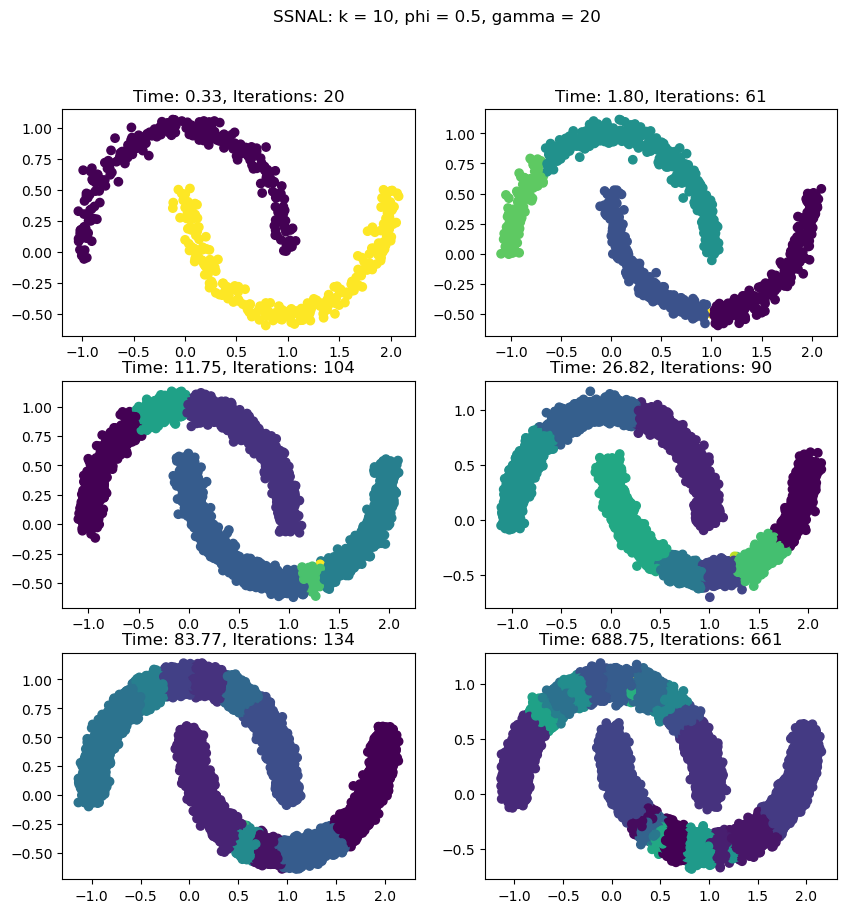

In [20]:
sizes = [500, 1000, 5000, 10000, 20000, 50000]
times = np.zeros(len(sizes))
iterations = np.zeros(len(sizes))
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for j, size in enumerate(sizes):
    X, y = datasets.make_moons(n_samples=size, random_state=seed, noise = .05)
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = 20)
    labels = ssnal.fit_predict(X)
    times[j] += ssnal.tot_time_
    iterations[j] += ssnal.iter_
    axes[j // 2, j % 2].scatter(X[:, 0], X[:, 1], c=labels)
    axes[j // 2, j % 2].set_title(f"N: {size}, Time: {times[j]:.2f}, Iterations: {iterations[j]:.0f}")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")

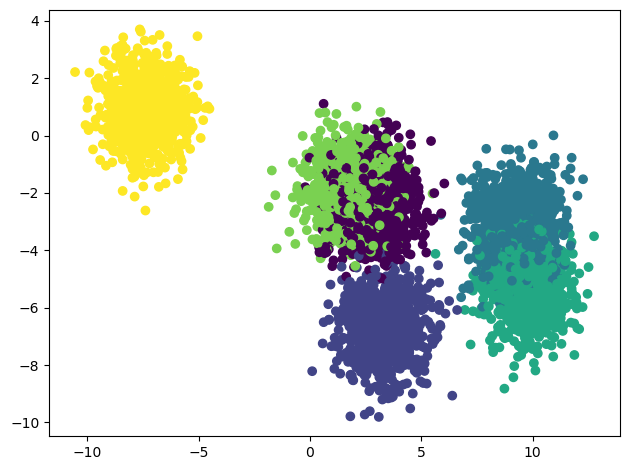

In [4]:
# generate 6 blobs and plot the true clusters
n_samples = 5000
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed, centers = 6, cluster_std = 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.tight_layout()
plt.show()

Computing weights...
Weights computed in 0.2762903330149129 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:345: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL terminated in 13.034212165977806 seconds.
Status: converged, Iterations: 57
Clustering completed in 13.310502498992719 seconds.
Computing weights...
Weights computed in 0.2401995409745723 seconds.
Starting SSNAL...
SSNAL terminated in 36.28061775001697 seconds.
Status: converged, Iterations: 187
Clustering completed in 36.520817290991545 seconds.
Computing weights...
Weights computed in 0.2447624999913387 seconds.
Starting SSNAL...
SSNAL terminated in 31.641064458002802 seconds.
Status: converged, Iterations: 165
Clustering completed in 31.88582695799414 seconds.
Computing weights...
Weights computed in 0.23905558401020244 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:444: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 34.407397959032096 seconds.
Status: converged, Iterations: 248
Clustering completed in 34.6464535430423 seconds.
Computing weights...
Weights computed in 0.2923528329702094 seconds.
Starting SSNAL...
SSNAL terminated in 41.029576166998595 seconds.
Status: converged, Iterations: 307
Clustering completed in 41.321928999968804 seconds.
Computing weights...
Weights computed in 0.24089354200987145 seconds.
Starting SSNAL...
SSNAL terminated in 23.05031483300263 seconds.
Status: converged, Iterations: 175
Clustering completed in 23.291208375012502 seconds.
Computing weights...
Weights computed in 0.21942929102806374 seconds.
Starting SSNAL...
SSNAL terminated in 8.169551624974702 seconds.
Status: converged, Iterations: 51
Clustering completed in 8.388980916002765 seconds.
Computing weights...
Weights computed in 0.21740537497680634 seconds.
Starting SSNAL...
SSNAL terminated in 49.55282895901473 seconds.
Status: converged, Iterations: 506
Clustering completed in 49.770234

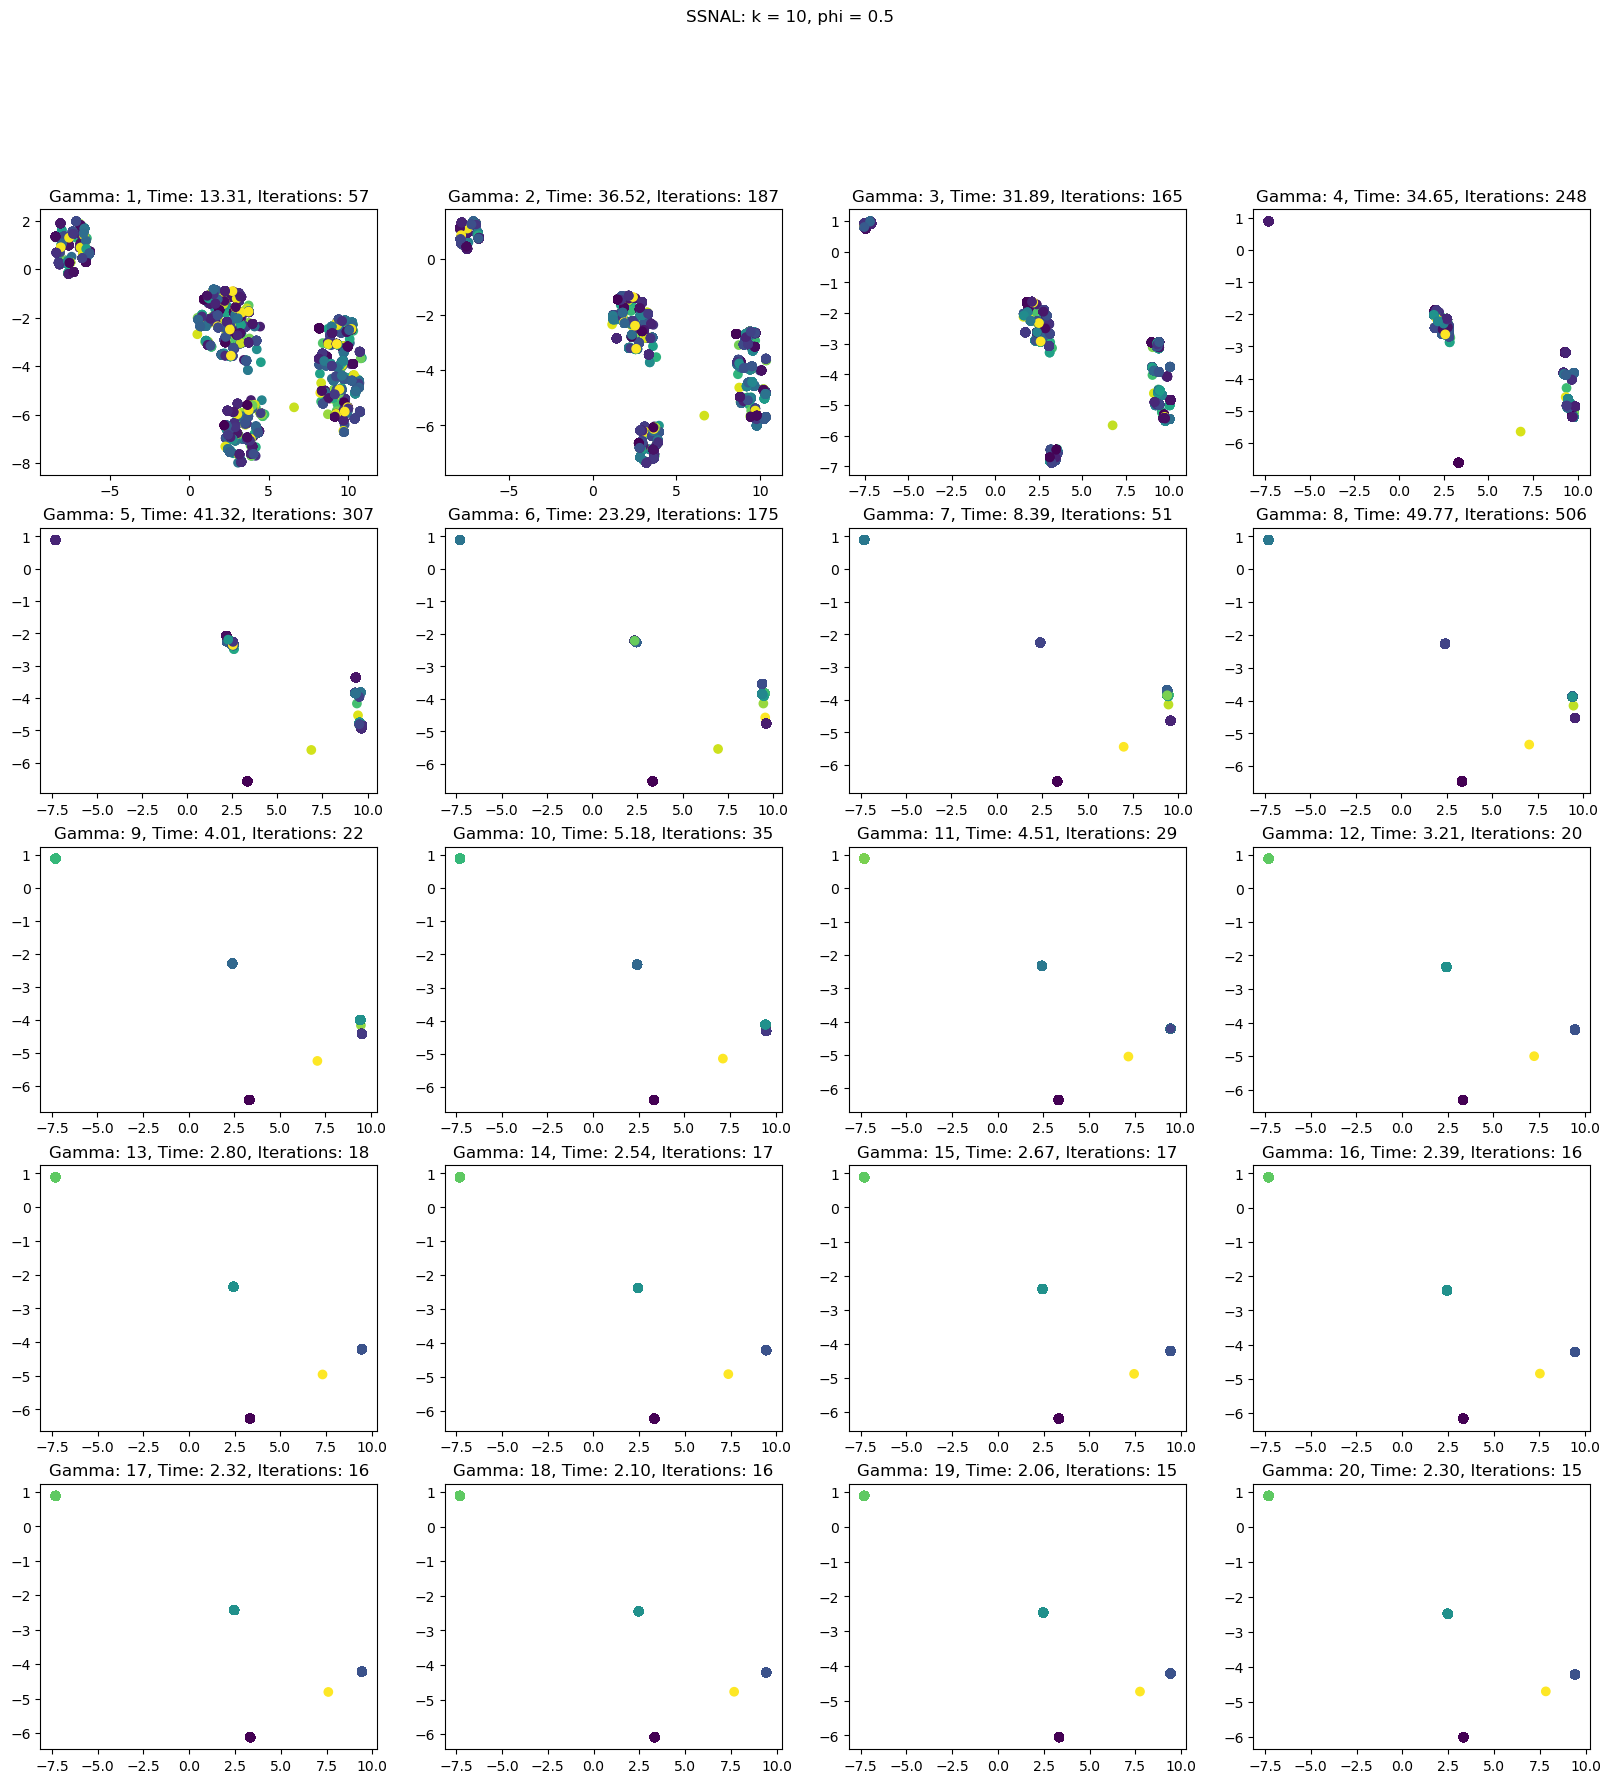

In [5]:
#run ssnal on the blobs with varying gamma from 1 to 20 and plot the results
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
for i in range(20):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = i+1)
    labels = ssnal.fit_predict(blobs[0], return_centers = True)
    axes[i // 4, i % 4].scatter(ssnal.xi[0, :], ssnal.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(f"Gamma: {i+1}, Time: {ssnal.tot_time_:.2f}, Iterations: {ssnal.iter_:.0f}")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}")
plt.show()


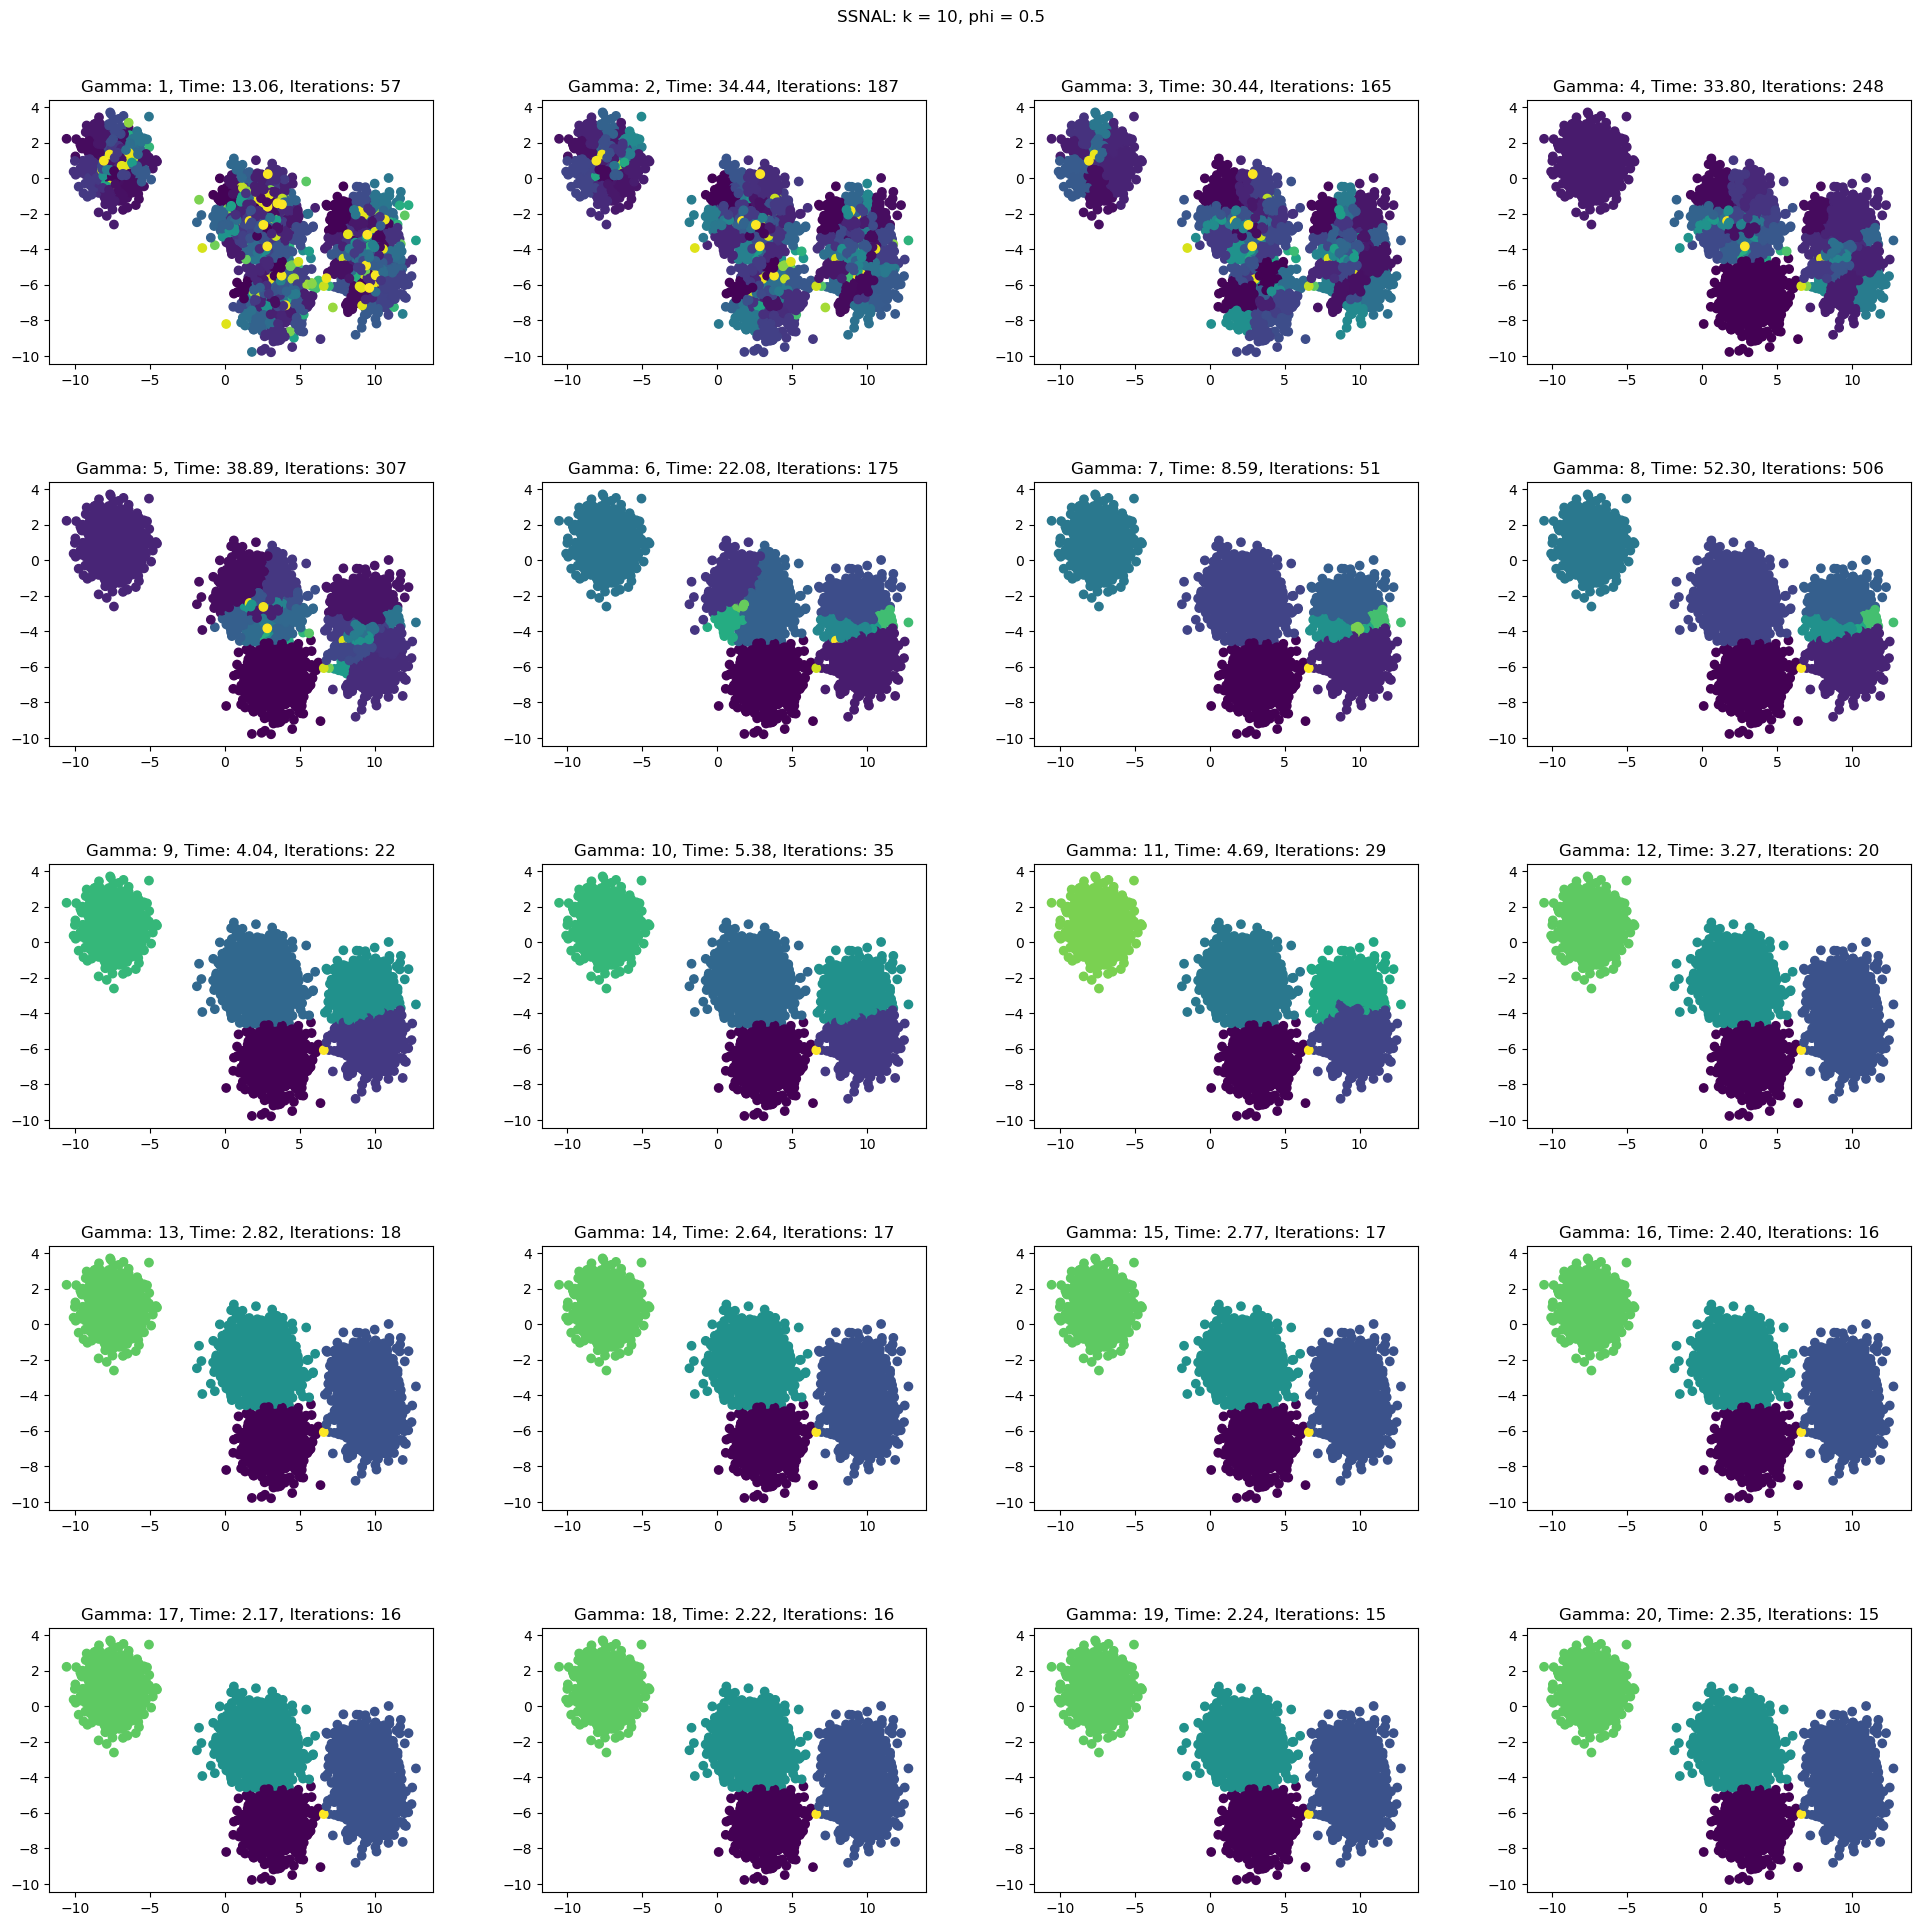

In [39]:
#run ssnal on the blobs with varying gamma from 1 to 20 and plot what clusters it comes up with
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
for i in range(20):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi = 0.5, gamma = i+1)
    labels = ssnal.fit_predict(blobs[0])
    axes[i // 4, i % 4].scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels)
    axes[i // 4, i % 4].set_title(f"Gamma: {i+1}, Time: {ssnal.tot_time_:.2f}, Iterations: {ssnal.iter_:.0f}")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}")
plt.show()
